<a href="https://colab.research.google.com/github/DanteBM/Aprendizaje-Profundo/blob/main/tareas/tarea1/tarea1ab_ap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregunta 1
> Un perceptrón o neurona no es capaz de aproximar una función que separe en dos clases
(naranja y azul) el conjunto de datos mostrado en la figura 1. Propón una transformación
aplicada a los atributos $x_1$ y $x_2$ de forma que puedan ser separados por solo un perceptrón.
Justifica porque la transformación propuesta funciona. (2 puntos.)

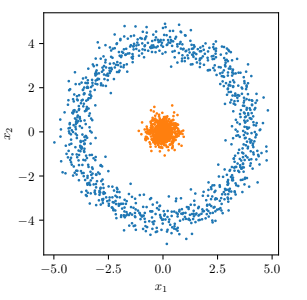

Una posible transformación es elevar los elementos al cuadrado, es decir, obtener $x_1^2$ y $x_2^2$. Esta transformación funciona ya que alude a la ecuación de la circunferencia (con centro en el origen), que es

$$
x^2 + y^2 = r^2
$$

De hecho, el problema podría ser resuelto, considerando la circunferencia con un radio de 2.5
$$
x_1^2 + x_2^2 \leq (2.5)^2
$$

Si la relación se cumple, estamos hablando de los puntos naranjas, de lo contrario, alude a los azules.

# Pregunta 2: extensión de regresión lineal
> Extiende el ejercicio `1c_reglin.ipynb` visto en clase para realizar regresión lineal con los dos atributos de entrada, usando únicamente tensores. (2 puntos.)

In [ ]:
import os

import matplotlib.pyplot as plt
plt.style.use("ggplot")

import numpy as np
import pandas as pd

import torch

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bereml/iap/master/datos/califs.csv')
df.head(5)

,prev,horas,calif
0,5.6,8.2,5.1
1,6.7,9.3,5.9
2,5.1,10.0,5.4
3,5.7,10.4,6.5
4,7.1,10.4,6.7


In [ ]:
X = df[["prev", "horas"]] # ahora son dos
X = torch.tensor(X.values).type(torch.float32)

y = df["calif"]
y = torch.tensor(y.values).view(-1, 1).type(torch.float32)

X.shape, y.shape

(torch.Size([50, 2]), torch.Size([50, 1]))

In [ ]:
def train(x, y_true, alpha=0.01, steps=10):
    """Fits linear regression."""

    # ejemplos, atributos
    m, d = x.shape

    # inicialización de parámetros
    w = torch.zeros(d, 1)
    b = torch.zeros(1)

    # histórico de pérdidas
    loss_hist = []
    r2_hist = []

    # ciclo de entrenamiento
    for i in range(steps):

        # cómputo de la hipótesis
        y_pred = x @ w + b

        # cómputo de la pérdida
        loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)
        ss_res = ((y_true - y_pred)**2).sum()
        ss_tot = ( (y_true - y_true.mean() )**2).sum()
        r2 = 1 - ss_res/ss_tot

        # cómputo del gradiente
        grad_w = (x.T @ (y_pred - y_true)) / m
        grad_b = (y_pred - y_true).sum() / m
        
        # actualización de parámetros
        w = w - alpha * grad_w
        b = b - alpha * grad_b
        

        # histórico de pérdida
        loss_hist.append(loss)
        r2_hist.append(r2)
    
    return w, b, loss_hist, r2_hist

Aparte de la pérdida, se agregó la métrica del coeficiente de determinación, mejor conocido como $r^2$, el cual queda definido como

$$
r^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y}_i)^2}
$$

Y (en principio), va de cero a uno, lo cual facilita la interpretación

In [ ]:
w, b, loss_hist, r2_hist = train(X, y, alpha=0.01, steps=100)

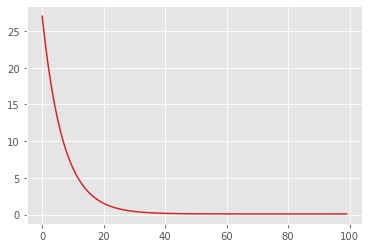

In [ ]:
plt.figure()
plt.plot(range(len(loss_hist)), loss_hist, color='tab:red')
plt.show()

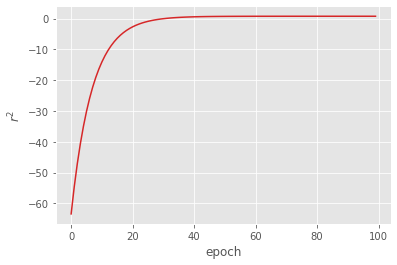

In [ ]:
plt.figure()
plt.plot(range(len(r2_hist)), r2_hist, color='tab:red')
plt.xlabel("epoch")
plt.ylabel("$r^2$")
plt.show()

In [ ]:
r2_hist[-1]

tensor(0.7827)